In [ ]:
#default_exp hasoc

In [ ]:
#export
from fastchai import config

In [ ]:
%%capture
!pip install light-the-torch
!ltt install torch torchvision
!pip install fastai==2.1.4 fastcore==1.3.2 nbdev --upgrade

#Ensure that you restart the runtime if it still shows the old version.

## Config

In [ ]:
ROOT='/content/gdrive/My Drive/Colab Notebooks/hasoc' if config.GDRIVE else './data' 
EN_DIR='en_task_a'
FILENAME='hasoc_2020_en_train_new.csv'
TEST='english_test.csv'

In [ ]:
#export
from fastai.text.all import *
from pathlib import Path

In [ ]:
assert (Path(ROOT)/'en_task_a').exists()
assert (Path(ROOT)/'en_task_a'/TEST).exists()

## Loading Data

In [ ]:
#export
def load_data(path:Path)->pd.DataFrame:
    pass

In [ ]:
df = pd.read_csv(Path(ROOT)/EN_DIR/FILENAME, sep='\t')
assert len(df) == 3708

df['tweet_id'] = df['tweet_id'].astype(str)

In [ ]:
df['is_valid'] = False

In [ ]:
df.head()

,tweet_id,text,task1,task2,ID,text_len,is_valid
0,1.1237572634271867e+18,"hate wen females hit ah nigga with tht bro 😂😂, I’m tryna make u my la sweety , fuck ah bro",HOF,PRFN,hasoc_2020_en_2574,90,False
1,1.1237333013977331e+18,RT @airjunebug: When you're from the Bay but you're really a NY nigga at heart. W/ @supportcaleon https://t.co/mZ8BAYlnlf,HOF,PRFN,hasoc_2020_en_3627,121,False
2,1.1237340941086595e+18,"RT @DonaldJTrumpJr: Dear Democrats: The American people aren’t stupid, they know what spying is and no amount of gaslighting will change th…",NOT,NONE,hasoc_2020_en_3108,140,False
3,1.126951188170199e+18,RT @SheLoveTimothy: He ain’t on drugs he just bored. I be doing the same shit when I’m bored 😂 https://t.co/tkdjSbddET,HOF,PRFN,hasoc_2020_en_3986,118,False
4,1.1268635104477102e+18,"RT @TavianJordan: Summer ‘19 I’m coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I’m ready I’m ready I’m…",NOT,NONE,hasoc_2020_en_5152,140,False


In [ ]:
test_df = pd.read_csv(Path(ROOT)/EN_DIR/TEST, sep=',')
test_df['is_valid'] = True
len(test_df) == 814

True

In [ ]:
test_df.head()

,tweet_id,text,task1,task2,ID,is_valid
0,1130081762154090497,RT @delmiyaa: Samini resetting the show and moving things along as if nothing happened is all you need to know about his greatness.,NOT,NONE,hasoc_2020_en_2713,True
1,1130048316807491584,@Swxnsea how do you know that he’s left?,HOF,NONE,hasoc_2020_en_3874,True
2,1123657766143504386,"Tried to get Divock Origi on a free seeing as he was at the club on loan. He accepted the offer, but for no actual… https://t.co/3WrM7NHjwV",NOT,NONE,hasoc_2020_en_281,True
3,1126782963042013186,RT @nutclusteruwu: that....is yalls stupid white ass reactions meeting tom holland in disneyland? are you fucking kidding me i would have d…,HOF,PRFN,hasoc_2020_en_2026,True
4,1130159113529434113,&amp; IT DID. But a bitch got big girls things to do now 😇,HOF,PRFN,hasoc_2020_en_4023,True


In [ ]:
all = pd.concat([df, test_df]);
len(all)
assert len(all) == 4522

In [ ]:
all['is_valid'].value_counts()

False    3708
True      814
Name: is_valid, dtype: int64

In [ ]:
list(df.columns), list(test_df.columns)

(['tweet_id', 'text', 'task1', 'task2', 'ID'],
 ['tweet_id', 'text', 'task1', 'task2', 'ID'])

In [ ]:
df['task1'].value_counts(), test_df['task1'].value_counts()

(HOF    1856
 NOT    1852
 Name: task1, dtype: int64, HOF    423
 NOT    391
 Name: task1, dtype: int64)

In [ ]:
df['task2'].value_counts(), test_df['task2'].value_counts()

(NONE    1852
 PRFN    1377
 OFFN     321
 HATE     158
 Name: task2, dtype: int64, NONE    414
 PRFN    293
 OFFN     82
 HATE     25
 Name: task2, dtype: int64)

In [ ]:
all['text_len'] = all['text'].apply(lambda x : len(x))

In [ ]:
all['text_len'].sum()/len(all)

98.47014595311809

## Language Model

In [ ]:
#export
def get_dataloaders(all:pd.DataFrame, is_lm:bool, config)->DataLoaders:
    pass

In [ ]:
dls_lm = TextDataLoaders.from_df(all, valid_pct=0.1, seed=42, text_col='text', is_lm=True, bs=128, seq_len=140)

In [ ]:
dls_lm.show_batch(max_n=1)

,text,text_
0,"xxbos xxup rt xxunk : if this xxunk is trash i m gon na xxup actually cry it 's 8 xxup am xxup in xxup the xxup morning xxup here and xxunk xxunk and asian armys b … xxbos xxup rt @realdonaldtrump : xxmaj as most people know , and for those who would like to know , i am xxunk pro - life , with the three xxunk - xxmaj rape , xxup i … xxbos xxmaj getting out the house now ! xxbos xxup rt xxunk : i feel bad for all the people who got to be xxunk for jin like … … you really think you ’re gon na be able to xxmaj manage hi … xxbos xxunk \n xxmaj you need to see this 😂 \n https : / / t.co / xxunk xxbos xxup","xxup rt xxunk : if this xxunk is trash i m gon na xxup actually cry it 's 8 xxup am xxup in xxup the xxup morning xxup here and xxunk xxunk and asian armys b … xxbos xxup rt @realdonaldtrump : xxmaj as most people know , and for those who would like to know , i am xxunk pro - life , with the three xxunk - xxmaj rape , xxup i … xxbos xxmaj getting out the house now ! xxbos xxup rt xxunk : i feel bad for all the people who got to be xxunk for jin like … … you really think you ’re gon na be able to xxmaj manage hi … xxbos xxunk \n xxmaj you need to see this 😂 \n https : / / t.co / xxunk xxbos xxup rt"


In [ ]:
del learn_lm

In [ ]:
learn_lm = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(lr_min=0.10964782238006592, lr_steep=0.02754228748381138)

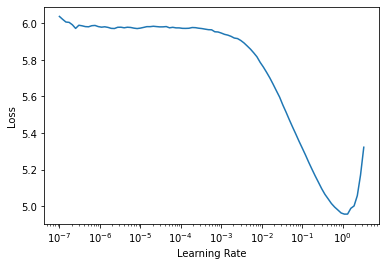

In [ ]:
learn_lm.lr_find()

In [ ]:
learn_lm.fine_tune(7, base_lr=2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.805091,4.806961,0.222743,122.359207,00:04


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.570975,4.121800,0.309896,61.670147,00:04
1,4.248092,3.735633,0.342014,41.914543,00:04
2,4.016548,3.582706,0.351997,35.970737,00:04
3,3.835278,3.455148,0.364063,31.662966,00:04
4,3.685046,3.412324,0.368056,30.335676,00:04
5,3.580752,3.399411,0.371788,29.946455,00:04
6,3.500516,3.395023,0.370399,29.815334,00:04


In [ ]:
learn_lm.save_encoder('fine_tuned_enc')

In [ ]:
#export
from fastai.learner import Learner

def train(
        dls:DataLoaders, 
        is_lm:bool,
        config)->Learner:
    
    if is_lm:
        pass
    else:
        pass

## Task 1 Classification - Hate Speech Detection

In [ ]:
dls_cls_tsk1 = DataBlock(
    blocks=(TextBlock.from_df(text_cols='text', vocab=dls_lm.vocab), CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('task1'),
    splitter=ColSplitter(col='is_valid'),
).dataloaders(all, seq_len=140, bs=128)

In [ ]:
dls_cls_tsk1.show_batch(max_n=1)

,text,category
0,xxbos xxup rt xxunk : xxup dear xxup thanos \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - \n - …,NOT


In [ ]:
del learn_cls_tsk1

In [ ]:
learn_cls_tsk1 = text_classifier_learner(dls_cls_tsk1, AWD_LSTM, metrics=[accuracy, F1Score(average='macro')], loss_func=LabelSmoothingCrossEntropyFlat()).to_fp16()
learn_cls_tsk1.load_encoder('fine_tuned_enc')

In [ ]:
learn_cls_tsk1.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=1.5848931980144698e-06)

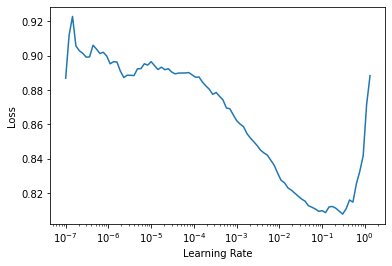

In [ ]:
learn_cls_tsk1.lr_find()

In [ ]:
learn_cls_tsk1.fine_tune(7, 3e-2) #Label Smoothing works great and also we changed the validation set to the test set

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.811168,0.601881,0.692875,0.683235,00:05


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.653342,0.505722,0.807125,0.806726,00:06
1,0.549306,0.445110,0.853808,0.853782,00:06
2,0.478721,0.452239,0.864865,0.864504,00:06
3,0.424653,0.474120,0.875921,0.875822,00:06
4,0.382380,0.456109,0.869779,0.869772,00:06
5,0.346060,0.470737,0.859951,0.859943,00:06
6,0.317610,0.462400,0.868550,0.868541,00:06


In [ ]:
#learn_cls_tsk1.fine_tune(10, 1.4e-3) #Old result not needed

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.770102,0.640420,0.630728,0.614553,00:04


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.667972,0.566275,0.719677,0.718939,00:05
1,0.647416,0.542833,0.700809,0.698275,00:05
2,0.626427,0.530974,0.716981,0.716775,00:05
3,0.597920,0.510023,0.733154,0.732376,00:05
4,0.576861,0.478575,0.746631,0.746216,00:05
5,0.552693,0.489319,0.768194,0.767584,00:05
6,0.527822,0.474808,0.768194,0.767449,00:05
7,0.506994,0.477738,0.760108,0.759661,00:05
8,0.486780,0.472012,0.768194,0.768058,00:05
9,0.478131,0.466463,0.768194,0.768192,00:05


In [ ]:
preds_raw, _, preds_tsk1 = learn_cls_tsk1.get_preds(dl=dls_cls_tsk1.valid, with_decoded=True)

In [ ]:
learn_cls_tsk1.dls.categorize.vocab[preds_tsk1]

(#814) ['NOT','NOT','NOT','HOF','HOF','NOT','HOF','HOF','HOF','HOF'...]

In [ ]:
submission_task1_df = test_df.drop(columns=['text', 'task1', 'task2', 'is_valid'])

In [ ]:
submission_task1_df['task1'] = learn_cls_tsk1.dls.categorize.vocab[preds_tsk1]

In [ ]:
submission_task1_df.head()

,tweet_id,ID,task1
0,1130081762154090497,hasoc_2020_en_2713,NOT
1,1130048316807491584,hasoc_2020_en_3874,NOT
2,1123657766143504386,hasoc_2020_en_281,NOT
3,1126782963042013186,hasoc_2020_en_2026,HOF
4,1130159113529434113,hasoc_2020_en_4023,HOF


In [ ]:
submission_task1_df.to_csv('submission_EN_A.csv', index=False)

In [ ]:
#export
from fastai.learner import Learner
from fastai.data.all import DataLoaders

from typing import List

def predict(learn:Learner, dls:DataLoaders)->List[str]:
    pass

## Classification - Task 2

In [ ]:
dls_cls_tsk2 = DataBlock(
    blocks=(TextBlock.from_df(text_cols='text', vocab=dls_lm.vocab), CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('task2'),
    splitter=ColSplitter(col='is_valid')
).dataloaders(all, seq_len=140, bs=128)

In [ ]:
del learn_cls_tsk2
learn_cls_tsk2 = text_classifier_learner(dls_cls_tsk2, AWD_LSTM, metrics=[accuracy, F1Score(average='macro')], loss_func=LabelSmoothingCrossEntropyFlat()).to_fp16()
learn_cls_tsk2.load_encoder('fine_tuned_enc')

### Without Weights

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.10000000149011612)

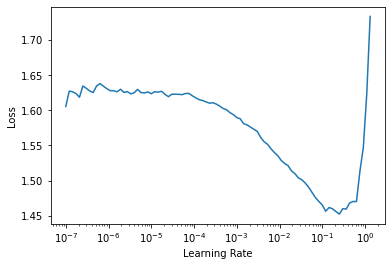

In [ ]:
learn_cls_tsk2.lr_find()

In [ ]:
learn_cls_tsk2.fine_tune(3, 2.5e-2)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.395348,0.974703,0.681818,0.377805,00:05


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.064528,0.839850,0.793612,0.477176,00:06
1,0.920528,0.746002,0.816953,0.530273,00:06
2,0.827596,0.750408,0.818182,0.543239,00:06


In [ ]:
#learn_cls_tsk2.fine_tune(5, 1.9e-2) #Not needed anymore Old one

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.349215,1.039876,0.595687,0.318555,00:04


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.996707,0.895949,0.654987,0.375300,00:05
1,0.890318,0.742220,0.716981,0.456922,00:05
2,0.730161,0.688776,0.787062,0.475367,00:05
3,0.603235,0.682857,0.776280,0.472363,00:05
4,0.500495,0.684234,0.776280,0.494802,00:05


### With weights

In [ ]:
  def get_weights(dls):
    
      # 0th index would provide the vocab from text
      # 1st index would provide the vocab from classes
      classes = dls.vocab[1]

      #Get label ids from the dataset using map
      #train_lb_ids = L(map(lambda x: x[1], dls.train_ds))
      # Get the actual labels from the label_ids & the vocab
      #train_lbls = L(map(lambda x: classes[x], train_lb_ids))

      #Combine the above into a single
      train_lbls = L(map(lambda x: classes[x[1]], dls.train_ds))
      label_counter = Counter(train_lbls)
      n_most_common_class = max(label_counter.values()); 
      print(f'Occurrences of the most common class {n_most_common_class}')
      
      # Source: https://discuss.pytorch.org/t/what-is-the-weight-values-mean-in-torch-nn-crossentropyloss/11455/9
      weights = [1/v for k, v in label_counter.items() if v > 0]; return weights 

In [ ]:
weights = get_weights(dls_cls_tsk2)

Occurrences of the most common class 1852


In [ ]:
weights

[0.0007262164124909223,
 0.0005399568034557236,
 0.003115264797507788,
 0.006329113924050633]

In [ ]:
class_weights = torch.FloatTensor(weights).to(dls_cls_tsk2.device)

In [ ]:
learn_cls_tsk2 = text_classifier_learner(dls_cls_tsk2, AWD_LSTM, metrics=[accuracy, F1Score(average='macro')]).to_fp16()
learn_cls_tsk2.load_encoder('fine_tuned_enc')
learn_cls_tsk2.loss_func = LabelSmoothingCrossEntropyFlat(weight=class_weights)

In [ ]:
learn_cls_tsk2.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.005248074419796467)

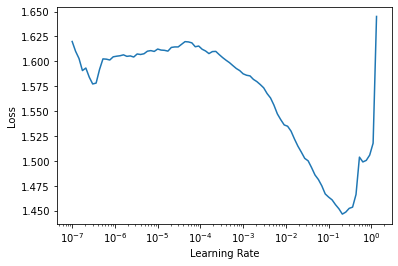

In [ ]:
learn_cls_tsk2.lr_find()

In [ ]:
learn_cls_tsk2.fine_tune(6, 5e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.473587,1.188835,0.606880,0.416698,00:05


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.254503,1.067564,0.681818,0.470836,00:06
1,1.173859,0.924063,0.745700,0.492076,00:06
2,1.059327,0.822301,0.785012,0.496157,00:06
3,0.965528,0.793076,0.793612,0.488469,00:06
4,0.892712,0.777327,0.807125,0.516852,00:06
5,0.843603,0.777120,0.803440,0.516741,00:06


In [ ]:
learn_cls_tsk2.validate(ds_idx=1)

(#3) [0.7849021553993225,0.8071253299713135,0.5111347519098411]

In [ ]:
interp.plot_top_losses(k=5)

,input,target,predicted,probability,loss
0,"xxbos xxmaj no shade , no tea about xxmaj xxunk xxmaj xxunk . xxmaj he ’s a very beautiful man . xxmaj and i hear tell that he ’s very good at xxunk s … https : / / t.co / xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",PRFN,NONE,0.9070174694061279,4.375500679016113
1,"xxbos xxup rt xxunk : 🇺 🇲 we 're xxup coming 🇺 🇲 \n xxmaj we 're taking our country by xxunk , "" bigger than ever before "" . xxmaj people from all xxunk are getting smart . xxup b … xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",OFFN,NONE,0.9218553304672241,4.256222248077393
2,"xxbos xxup rt xxunk : i ca n’t wait to xxunk all my friends with my xxunk ! \n\n “ get in loser , we ’re going to xxmaj xxunk ” \n\n xxmaj here ’s $ 10 , xxrep 3 0 . xxmaj start … xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",PRFN,NONE,0.914258599281311,4.10779333114624
3,xxbos xxup rt xxunk : this is the cutest shit i ’ve ever seen xxunk https : / / t.co / xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,NONE,PRFN,0.9241439700126648,4.045537948608398
4,xxbos xxup rt xxunk : i fuck with you but you do n’t fuck with me xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,OFFN,PRFN,0.9536961913108826,3.983731746673584


In [ ]:
interp = ClassificationInterpretation.from_learner(learn_cls_tsk2)

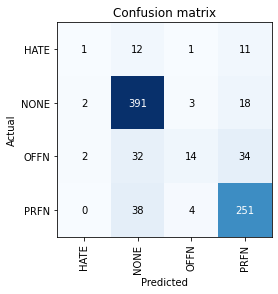

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('NONE', 'PRFN', 29),
 ('OFFN', 'PRFN', 14),
 ('OFFN', 'NONE', 10),
 ('HATE', 'NONE', 9),
 ('NONE', 'OFFN', 9),
 ('PRFN', 'NONE', 8),
 ('HATE', 'PRFN', 5),
 ('NONE', 'HATE', 4),
 ('PRFN', 'OFFN', 3),
 ('HATE', 'OFFN', 1),
 ('OFFN', 'HATE', 1)]

In [ ]:
learn_cls_tsk2.predict('What the fuck are you talking. go to hell')

('PRFN', tensor(3), tensor([0.0014, 0.0010, 0.0013, 0.9963]))

In [ ]:
learn_cls_tsk2.predict("I will chop off your head and kill you")

('OFFN', tensor(2), tensor([0.0061, 0.1064, 0.5032, 0.3843]))

In [ ]:
submission_task2_df = test_df.drop(columns=['text', 'task1', 'task2', 'is_valid'])

preds_raw, _, preds_tsk2 = learn_cls_tsk2.get_preds(dl=dls_cls_tsk2.valid, with_decoded=True)
submission_task2_df['task2'] = learn_cls_tsk2.dls.categorize.vocab[preds_tsk2]
submission_task2_df.to_csv('submission_EN_B.csv', index=False)